# LAB | Intro to Machine Learning

**Load the data**

In this challenge, we will be working with Spaceship Titanic data. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [1]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [3]:
# Check the shape of the data
print("Shape of the data:", spaceship.shape)


Shape of the data: (8693, 14)


**Check for data types**

In [4]:
# Check data types
print("Data types of each column:")
print(spaceship.dtypes)

Data types of each column:
PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object


**Check for missing values**

In [5]:
# Check for missing values
print("Missing values in each column:")
print(spaceship.isnull().sum())


Missing values in each column:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [6]:
# Drop rows with any missing values
spaceship_cleaned = spaceship.dropna()

# Check the new shape to confirm rows with missing values were removed
print("Shape of the data after dropping rows with missing values:", spaceship_cleaned.shape)

# Optionally, verify there are no more missing values
print("Missing values in cleaned data:")
print(spaceship_cleaned.isnull().sum())


Shape of the data after dropping rows with missing values: (6606, 14)
Missing values in cleaned data:
PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64


**KNN**

K Nearest Neighbors is a distance based algorithm, and requeries all **input data to be numerical.**

Let's only select numerical columns as our features.

In [7]:
# Select only numerical columns
numerical_features = spaceship_cleaned.select_dtypes(include=['number'])

# Display the selected numerical features
print("Numerical columns selected:")
print(numerical_features.head())

# Check the shape of the numerical features DataFrame
print("Shape of numerical features:", numerical_features.shape)


Numerical columns selected:
    Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck
0  39.0          0.0        0.0           0.0     0.0     0.0
1  24.0        109.0        9.0          25.0   549.0    44.0
2  58.0         43.0     3576.0           0.0  6715.0    49.0
3  33.0          0.0     1283.0         371.0  3329.0   193.0
4  16.0        303.0       70.0         151.0   565.0     2.0
Shape of numerical features: (6606, 6)


And also lets define our target.

In [9]:
# Define the target column (replace 'TargetColumn' with the actual column name)
target = spaceship_cleaned['Transported']

# Display the first few rows of the target variable
print("Target variable:")
print(target.head())

# Check the shape of the target
print("Shape of the target variable:", target.shape)


Target variable:
0    False
1     True
2    False
3    False
4     True
Name: Transported, dtype: bool
Shape of the target variable: (6606,)


**Train Test Split**

Now that we have split the data into **features** and **target** variables and imported the **train_test_split** function, split X and y into X_train, X_test, y_train, and y_test. 80% of the data should be in the training set and 20% in the test set.

In [10]:
from sklearn.model_selection import train_test_split

# Define features (numerical features) and target
X = numerical_features
y = target

# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the splits to confirm
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (5284, 6)
Shape of X_test: (1322, 6)
Shape of y_train: (5284,)
Shape of y_test: (1322,)


**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

You need to choose between **Classificator** or **Regressor**. Take into consideration target variable to decide.

Initialize a KNN instance without setting any hyperparameter.

In [11]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN classifier without setting any hyperparameters
knn = KNeighborsClassifier()

# Display the initialized KNN instance
print(knn)


KNeighborsClassifier()


Fit the model to your data.

In [12]:
# Fit the KNN model to the training data
knn.fit(X_train, y_train)

# Confirm the model has been trained
print("KNN model has been fitted to the training data.")


KNN model has been fitted to the training data.


Evaluate your model.

Accuracy of the model: 0.7715582450832073
Classification Report:
              precision    recall  f1-score   support

       False       0.79      0.74      0.76       653
        True       0.76      0.80      0.78       669

    accuracy                           0.77      1322
   macro avg       0.77      0.77      0.77      1322
weighted avg       0.77      0.77      0.77      1322

Confusion Matrix:
[[483 170]
 [132 537]]


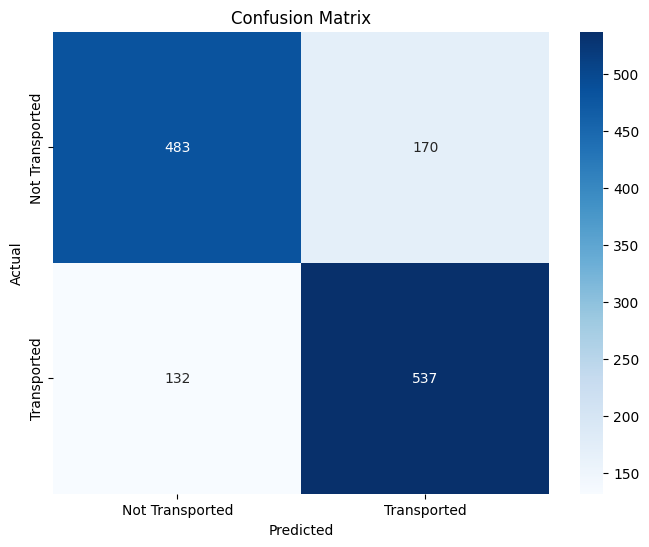

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred = knn.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model:", accuracy)
# Detailed classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Transported', 'Transported'], yticklabels=['Not Transported', 'Transported'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Congratulations, you have just developed your first Machine Learning model!**